In [127]:
import numpy as np
from datetime import datetime
import pandas as pd 
import time
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import json
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [128]:
import seaborn as sns
import xgboost as xgb
from sklearn import metrics
from  sklearn.datasets  import  make_hastie_10_2
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import TimeSeriesSplit  
from sklearn.preprocessing import StandardScaler    

### Load Data

In [129]:
# load the x data
df_x = pd.read_json("./x.json")
# load the y data
df_y = pd.read_json("./y.json")

In [130]:
# show df_x
df_x

,date,code,AR,ARBR,ATR14,ATR6,BR,MAWVAD,money_flow_20,PSY,...,EMA5,EMAC10,EMAC20,MAC10,MAC20,MAC5,MAC60,MACDC,MFI14,price_no_fq
0,2016-01-04,000001.XSHE,110.409767,25.644803,30.437857,29.033333,84.764964,-407161.365140,1.488764e+10,58.333333,...,1.046541,1.059017,1.068195,1.074086,1.066999,1.050498,1.053507,-0.013772,57.368374,11.33
1,2016-01-05,000001.XSHE,133.235675,32.318378,31.708571,33.403333,100.917298,-713159.294704,1.515273e+10,58.333333,...,1.026953,1.041909,1.055058,1.057316,1.056656,1.033443,1.046810,-0.017497,55.751228,11.40
2,2016-01-06,000001.XSHE,139.986358,33.275754,31.976429,28.563333,106.710604,-616696.534018,1.514257e+10,58.333333,...,1.010643,1.024741,1.039347,1.037976,1.043308,1.012405,1.035999,-0.017391,60.331501,11.53
3,2016-01-07,000001.XSHE,124.793163,32.442695,34.452143,36.213333,92.350467,-581030.864769,1.482092e+10,50.000000,...,1.043129,1.065157,1.086256,1.079817,1.094725,1.045642,1.091781,-0.024276,56.393160,10.94
4,2016-01-08,000001.XSHE,96.158562,14.735525,33.515714,39.805000,81.423037,-624083.124657,1.514966e+10,58.333333,...,1.017695,1.039558,1.062557,1.051693,1.073646,1.013318,1.074454,-0.024213,54.615205,11.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419986,2017-10-30,601989.XSHG,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000e+00,0.000000,...,0.992277,1.003613,1.039523,0.998546,1.031826,0.987076,1.147711,0.003604,41.556585,6.21
419987,2017-10-31,601989.XSHG,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000e+00,0.000000,...,0.992277,1.003613,1.039523,0.998546,1.031826,0.987076,1.147711,0.003604,41.556585,6.21
419988,2017-11-01,601989.XSHG,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000e+00,0.000000,...,0.992277,1.003613,1.039523,0.998546,1.031826,0.987076,1.147711,0.003604,41.556585,6.21
419989,2017-11-02,601989.XSHG,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000e+00,0.000000,...,0.992277,1.003613,1.039523,0.998546,1.031826,0.987076,1.147711,0.003604,41.556585,6.21


In [131]:
# show df_y
df_y

,date,code,close_0,close_1,close_5,change_5,change_5_class6
0,2016-01-04,000001.XSHE,8.72,8.77,8.28,-5.587229,2
1,2016-01-05,000001.XSHE,8.77,8.87,8.32,-6.200676,1
2,2016-01-06,000001.XSHE,8.87,8.42,8.24,-2.137767,2
3,2016-01-07,000001.XSHE,8.42,8.56,8.29,-3.154206,2
4,2016-01-08,000001.XSHE,8.56,8.28,8.05,-2.777778,2
...,...,...,...,...,...,...,...
419979,2021-09-15,603993.XSHG,7.88,7.59,6.82,-10.144928,1
419980,2021-09-16,603993.XSHG,7.59,7.28,6.25,-14.148352,1
419981,2021-09-17,603993.XSHG,7.28,7.17,6.24,-12.970711,1
419982,2021-09-22,603993.XSHG,7.17,7.13,5.90,-17.251052,1


### Pre_process Data

In [132]:
# record some important infor
attr_list = df_x.columns[2:]
print("number of attrs:",len(attr_list))
date_list = list(set(df_x.sort_values(by = ["date"],ascending = True)["date"].tolist()))
print("number of dates:",len(date_list))

number of attrs: 100
number of dates: 1400


In [133]:
# merge to a df
df = df_y[["date","code","change_5_class6"]]
df = pd.merge(df,df_x, how = "left", on=['date',"code"])
df["date"] = df["date"].astype("str")
df["date+code"] = df["date"] + df["code"]
df = df.sort_values(by = ["date","code"],ascending = True).reset_index(drop=True)
df

,date,code,change_5_class6,AR,ARBR,ATR14,ATR6,BR,MAWVAD,money_flow_20,...,EMAC10,EMAC20,MAC10,MAC20,MAC5,MAC60,MACDC,MFI14,price_no_fq,date+code
0,2016-01-04,000001.XSHE,2,110.409767,25.644803,30.437857,29.033333,84.764964,-4.071614e+05,1.488764e+10,...,1.059017,1.068195,1.074086,1.066999,1.050498,1.053507,-0.013772,57.368374,11.33,2016-01-04000001.XSHE
1,2016-01-04,000002.XSHE,4,312.139041,79.080897,65.299286,0.000000,233.058144,2.309413e+05,4.327219e+10,...,0.840825,0.772377,0.829881,0.742805,0.883960,0.619546,0.040482,82.748595,24.43,2016-01-04000002.XSHE
2,2016-01-04,000012.XSHE,1,98.126464,-26.912569,19.307857,17.405000,125.039033,-6.536162e+06,1.517055e+10,...,1.109035,1.072007,1.171313,1.057604,1.113364,0.924347,-0.022349,33.045483,12.02,2016-01-04000012.XSHE
3,2016-01-04,000027.XSHE,1,41.843723,-7.018343,5.064286,5.770000,48.862066,-1.141257e+06,4.974648e+09,...,1.111346,1.142363,1.130788,1.133758,1.099636,1.182364,-0.017570,45.792142,8.84,2016-01-04000027.XSHE
4,2016-01-04,000039.XSHE,1,107.936618,5.712969,23.883571,28.660000,102.223649,4.725451e+05,1.032765e+10,...,1.104506,1.101068,1.129907,1.095927,1.106506,1.057071,-0.016443,55.344783,19.05,2016-01-04000039.XSHE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418484,2021-09-23,601998.XSHG,4,134.586466,34.586466,0.130714,0.140000,100.000000,-3.005437e+06,2.792454e+09,...,1.020880,1.023238,1.030482,1.024013,1.014035,1.028692,-0.007453,66.797598,4.56,2021-09-23601998.XSHG
418485,2021-09-23,603019.XSHG,2,85.265027,11.873144,2.497857,2.721667,73.391882,-6.313294e+06,9.515408e+09,...,1.011434,1.030726,1.018858,1.032641,0.991835,1.071730,-0.007758,54.387590,27.68,2021-09-23603019.XSHG
418486,2021-09-23,603288.XSHG,6,87.035920,42.629073,20.126429,20.596667,44.406846,-1.344370e+06,1.610087e+10,...,0.983878,1.026795,0.973793,1.020758,0.967766,1.198244,0.014243,51.241326,91.58,2021-09-23603288.XSHG
418487,2021-09-23,603806.XSHG,5,85.697999,0.094546,30.885714,29.653333,85.603452,-3.028309e+06,2.756114e+10,...,1.125779,1.152676,1.141486,1.206028,1.104321,1.085498,-0.058926,27.627275,118.04,2021-09-23603806.XSHG


### Data Makeup

In [134]:
# see the null
print("null:",df.isna().sum().tolist())

null: [0, 0, 0, 5767, 5770, 0, 0, 5672, 143, 0, 0, 294, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 525, 7675, 9209, 9098, 0, 0, 416, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6087, 0, 0, 6092, 3722, 0, 0, 0, 0, 0, 0, 0, 0, 1569, 0, 0, 0, 0, 0, 0, 0, 64329, 0, 0, 0, 16093, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 300, 0]


In [135]:
# use mean to makeup
for column in list(df.columns[df.isnull().sum() > 0]):
    mean_val = df[column].mean()
    df[column].fillna(mean_val, inplace=True)

In [136]:
# see the null
print("null:",df.isna().sum().tolist())

null: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### Split

In [137]:
# generate x,y
X = df.drop(["date","code","date+code","change_5_class6"], axis = 1)
y = df['change_5_class6']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# split to train and test
# from 2016-01-04 to 2020-12-31; from 2021-01-04 to 2021-09-23
X_train = X[:365400]
y_train = y[:365400]
X_test = X[365400:]
y_test = y[365400:]

### Feature Selection

In [138]:
# copy data for feature selection
X_feature = X_train
X_feature = X_feature.apply(lambda x: (x - np.mean(x)) / (np.std(x)))
y_feature = y_train
X_feature_array = X_feature.values
y_feature_array = y_feature.values

In [139]:
# l1 selection
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.001)
lasso.fit(X_feature_array, y_feature_array)
lasso_list = lasso.coef_
lasso_list = [abs(i) for i in lasso_list]

In [140]:
# l2 selection
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=10)
ridge.fit(X_feature_array, y_feature_array)
ridge_list = ridge.coef_
ridge_list = [abs(i) for i in ridge_list]

In [141]:
# ANOVA
from sklearn.feature_selection import SelectKBest, chi2, f_classif
best_features = SelectKBest(score_func=f_classif,  k=100)
fit = best_features.fit(X_feature_array, y_feature_array)
ANOVA_list = fit.scores_
ANOVA_list = [abs(i) for i in ANOVA_list]

In [142]:
# feature group
# load the feature data
df_feature = pd.read_excel("./factors_1.xls")
df_feature = df_feature[["factor","category"]]
print(df_feature["category"].value_counts())
#dict_feature = dict(zip(df_feature['factor'],df_feature['category']))
df_feature.head()

emotion      30
momentum     29
style        21
technical    12
risk          8
Name: category, dtype: int64


,factor,category
0,AR,emotion
1,ARBR,emotion
2,ATR14,emotion
3,ATR6,emotion
4,BR,emotion


In [143]:
# add the importance to the feature
df_feature["l1"] = lasso_list
df_feature["l2"] = ridge_list
df_feature["ANOVA"] = ANOVA_list
df_feature["l1"] = df_feature["l1"].rank(method="first")
df_feature["l2"] = df_feature["l2"].rank(method="first")
df_feature["ANOVA"] = df_feature["ANOVA"].rank(method="first")
df_feature["final_para"] = (df_feature["l1"]+df_feature["l2"]+df_feature["ANOVA"])/3
df_feature["final_para"] = df_feature["final_para"].rank(method="first")
df_feature.head()
# select 
# df_feature[df_feature["category"] == "risk"].sort_values(by = ["final_para"],ascending = False)

,factor,category,l1,l2,ANOVA,final_para
0,AR,emotion,45.0,25.0,69.0,41.0
1,ARBR,emotion,46.0,19.0,6.0,14.0
2,ATR14,emotion,28.0,8.0,3.0,2.0
3,ATR6,emotion,1.0,6.0,2.0,1.0
4,BR,emotion,30.0,31.0,5.0,13.0


In [144]:
# select the proper features, 40
# emotion      10
# momentum     9
# style        10
# technical    6
# risk         5
feature_after_selection = ["turnover_volatility","TVSTD20","money_flow_20","PSY","TVSTD6","VOL20","VEMA5","VSTD10","AR","VOL5"\
                          ,"CR20","ROC20","PLRC24","CCI20","Rank1M","TRIX10","bear_power","Price1M","Volume1M"\
                          ,"beta","raw_beta","momentum","relative_strength","daily_standard_deviation","cumulative_range","liquidity","historical_sigma","earnings_yield","residual_volatility"\
                          ,"boll_down","MAC60","MAC5","EMA5","boll_up","MFI14"\
                          ,"Variance20","sharpe_ratio_60","Kurtosis60","Skewness20","Variance60"]
print("number of features:",len(feature_after_selection))
df_feature_after_selection = df_feature[df_feature["factor"].isin(feature_after_selection)].reset_index(drop=True)
print(df_feature_after_selection.shape)

number of features: 40
(40, 6)


### Split Again

In [145]:
# df2 is after feature selection
df2 = df.copy()
df2 = df2[["date","code","date+code","change_5_class6"]+feature_after_selection]
# generate x,y
X = df2.drop(["date","code","date+code","change_5_class6"], axis = 1)
y = df2['change_5_class6']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# split to train and test
# from 2016-01-04 to 2020-12-31; from 2021-01-04 to 2021-09-23
X_train = X[:365400]
y_train = y[:365400]
X_test = X[365400:]
y_test = y[365400:]
# set validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

### LR Model

In [146]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr = logisticRegr.fit(X_train, y_train)

In [147]:
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score)

0.22754242875171882


### Naive Bayes Model

In [148]:
from sklearn import datasets, model_selection, naive_bayes
clf_nb = naive_bayes.GaussianNB()
clf_nb = clf_nb.fit(X_train, y_train)

In [149]:
# Use score method to get accuracy of model
score = clf_nb.score(X_test, y_test)
print(score)

0.21058976435796492


### Random Forest

In [150]:
from sklearn.ensemble import RandomForestClassifier
clf_rf=RandomForestClassifier(max_depth=3,min_samples_split=30000)
clf_rf=clf_rf.fit(X_test, y_test)

In [151]:
# Use score method to get accuracy of model
score = clf_rf.score(X_test, y_test)
print(score)

0.25777468025391326


### GBDT

In [152]:
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [153]:
clf_gbdt = GradientBoostingClassifier(n_estimators=5, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_train, y_train)
score = clf_gbdt.score(X_test, y_test)
print(score)

0.2590932208178719


### Test

In [154]:
# load model
model_xgb_2 = xgb.Booster()
model_xgb_2.load_model("./xgb.model")

In [155]:
# compute the val acc
data_test = xgb.DMatrix(X_test, y_test)
y_predicted = model_xgb_2.predict(data_test)
y = data_test.get_label()
 
accuracy = sum(y == y_predicted )
accuracy_rate = float(accuracy) / len(y_predicted)
print ('sample number：{0}'.format(len(y_predicted)))
print ('true number：{0}'.format(accuracy) )
print ('acc%：{0:.3f}'.format((accuracy_rate)))

sample number：53089
true number：14089
acc%：0.265


In [156]:
#evaluate
y_true = y
y_pred = y_predicted
judge = classification_report(y_true, y_pred)
print(judge)

              precision    recall  f1-score   support

         1.0       0.27      0.15      0.19      4759
         2.0       0.25      0.48      0.33     11484
         3.0       0.28      0.23      0.25     10911
         4.0       0.32      0.31      0.32     10809
         5.0       0.21      0.20      0.20      9405
         6.0       0.26      0.01      0.03      5721

    accuracy                           0.27     53089
   macro avg       0.27      0.23      0.22     53089
weighted avg       0.27      0.27      0.24     53089



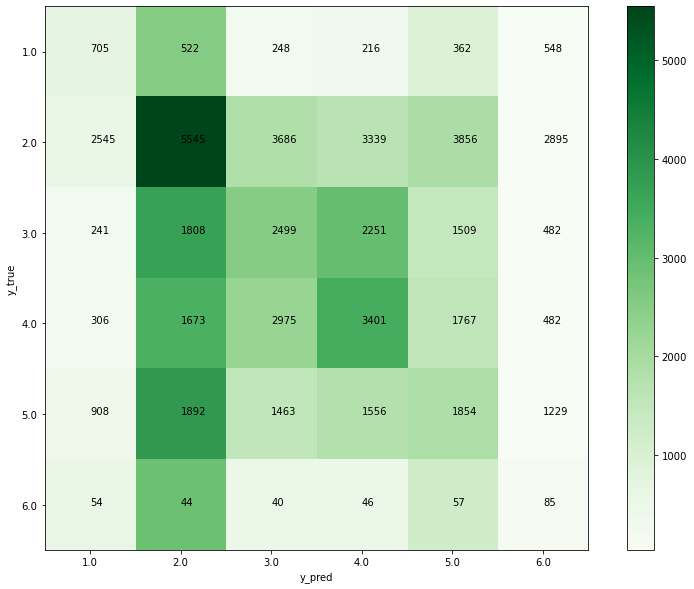

In [157]:
#混淆矩阵的评价
classes = [1.0,2.0,3.0,4.0,5.0,6.0]
confusion = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(14,10))
plt.imshow(confusion, cmap=plt.cm.Greens)
indices = range(len(confusion))
plt.xticks(indices, classes)
plt.yticks(indices, classes)
plt.colorbar()
plt.xlabel('y_pred')
plt.ylabel('y_true')
for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index])
plt.show()